In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
features = pd.read_csv("C:/HAR/PAMAP/pamap2.csv", index_col=0)

In [71]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [72]:
features.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [73]:
features['activityID'].value_counts()

4     20998
1     17575
3     17256
2     16881
7     16857
12    10699
13     9585
5      8665
Name: activityID, dtype: int64

In [74]:
activity = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    7: 'Nordic_walking',
    12: 'ascending_stairs',
    13: 'descending_stairs'
}

In [75]:
features['activityID'] = features['activityID'].map(activity)

In [76]:
features['activityID'].value_counts()

walking              20998
lying                17575
standing             17256
sitting              16881
Nordic_walking       16857
ascending_stairs     10699
descending_stairs     9585
running               8665
Name: activityID, dtype: int64

In [77]:
features['target'] = features['activityID'].copy()

In [78]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,target
2932,37.70,lying,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1,lying
2943,37.81,lying,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1,lying
2954,37.92,lying,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1,lying
2965,38.03,lying,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1,lying
2976,38.14,lying,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,running,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8,running
2818413,3629.77,running,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8,running
2818423,3629.87,running,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8,running
2818435,3629.99,running,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8,running


In [79]:
features.loc[features['target'].isin(['lying', 'sitting', 'standing']), 'target'] = 0
features.loc[features['target'].isin(['walking', 'Nordic_walking', 'ascending_stairs', 'descending_stairs']), 'target'] = 1
features.loc[features['target'].isin(['running']), 'target'] = 2

In [80]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,target
2932,37.70,lying,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1,0
2943,37.81,lying,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1,0
2954,37.92,lying,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1,0
2965,38.03,lying,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1,0
2976,38.14,lying,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,running,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8,2
2818413,3629.77,running,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8,2
2818423,3629.87,running,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8,2
2818435,3629.99,running,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8,2


In [81]:
features = features.replace({'activityID':'lying'},0)
features = features.replace({'activityID':'sitting'},1)
features = features.replace({'activityID':'standing'},2)
features = features.replace({'activityID':'walking'},3)
features = features.replace({'activityID':'Nordic_walking'},4)
features = features.replace({'activityID':'ascending_stairs'},5)
features = features.replace({'activityID':'descending_stairs'},6)
features = features.replace({'activityID':'running'},7)

In [82]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,target
2932,37.70,0,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1,0
2943,37.81,0,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1,0
2954,37.92,0,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1,0
2965,38.03,0,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1,0
2976,38.14,0,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,7,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8,2
2818413,3629.77,7,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8,2
2818423,3629.87,7,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8,2
2818435,3629.99,7,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8,2


### Features

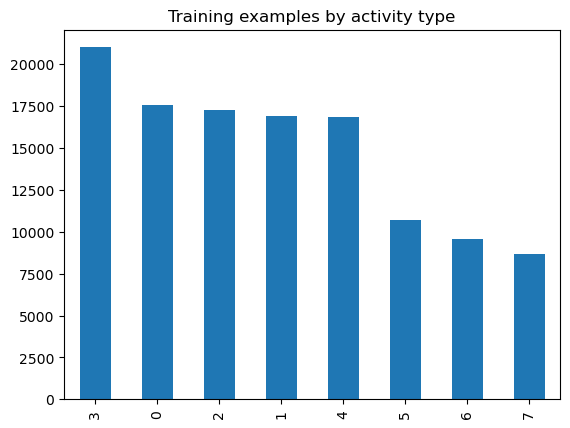

In [83]:
features['activityID'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [84]:
features['activityID'].value_counts()

3    20998
0    17575
2    17256
1    16881
4    16857
5    10699
6     9585
7     8665
Name: activityID, dtype: int64

In [85]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [86]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = features[['timestamp', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id']]
              
y= features['target']
              
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['timestamp', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'])
scaled_X['label'] = y.values

scaled_X

,timestamp,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,label
0,-1.429344,-0.235131,-1.440141,1.045326,0.482125,0.795339,1.020984,0.515007,0.709843,-0.050077,...,-0.006156,-1.558147,-1.710012,-3.810677,2.079851,0.157504,-0.885210,0.347128,-1.534972,0
1,-1.429245,-0.235131,-1.440141,1.037394,0.511525,0.645671,1.027347,0.538227,0.625688,-0.332105,...,0.003136,-1.587867,-1.669848,-3.842166,2.079851,0.157504,-0.885210,0.347128,-1.534972,0
2,-1.429146,-0.235131,-1.440141,1.045173,0.462137,0.795477,1.041029,0.546666,0.755891,0.063629,...,0.001474,-1.622374,-1.673671,-3.841926,2.079851,0.157504,-0.885210,0.347128,-1.534972,0
3,-1.429047,-0.235131,-1.440141,1.073278,0.516997,0.817213,1.076369,0.588809,0.797656,-0.197698,...,-0.000922,-1.650829,-1.692339,-3.835482,2.079851,0.157504,-0.885210,0.347128,-1.534972,0
4,-1.428947,-0.199899,-1.440141,1.105348,0.620071,0.433665,1.077076,0.614042,0.406751,0.298940,...,-0.007432,-1.569824,-1.728473,-3.868852,2.079851,0.157504,-0.885210,0.347128,-1.534972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118511,1.811580,3.111967,-1.165928,0.794540,-0.131965,1.677221,0.797847,-0.120649,1.679528,0.035138,...,-0.011070,0.627808,0.456278,0.589894,-0.703872,1.594945,-0.236870,1.514820,1.504345,2
118512,1.811679,3.111967,-1.165928,0.795351,-0.101852,1.709010,0.774020,-0.114122,1.687951,0.013226,...,-0.000195,0.627726,0.456265,0.582507,-0.698482,1.593277,-0.232015,1.515162,1.504345,2
118513,1.811770,3.111967,-1.165928,0.822222,-0.107129,1.688498,0.815225,-0.118655,1.671080,0.005065,...,0.004172,0.614712,0.445431,0.567694,-0.697343,1.592946,-0.229715,1.514767,1.504345,2
118514,1.811878,3.111967,-1.165928,0.789545,-0.121845,1.698325,0.780490,-0.097241,1.641642,-0.033046,...,-0.004555,0.601117,0.474448,0.589775,-0.690007,1.590648,-0.225576,1.516053,1.504345,2


In [87]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
scaled_X["label"] = encoder.fit_transform(scaled_X["label"])

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [89]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (94812, 55)
X_test.shape  (23704, 55)
y_train.shape  (94812,)
y_test.shape  (23704,)


### ML(SVM, DT, RF, LR)

In [90]:
# Classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


--- SVM Classifier ---
0.9997046911913601
[[10310     1     0]
 [    0 11725     5]
 [    0     1  1662]]


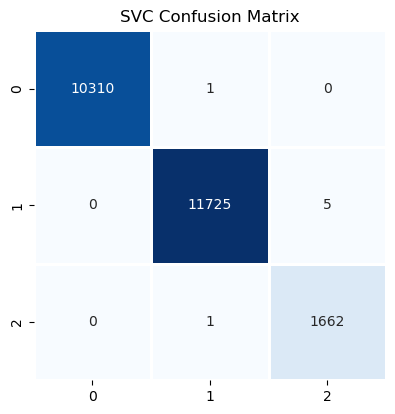

In [91]:
# SVM

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("SVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_svm), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Decision Tree Classifier ---
1.0
[[10311     0     0]
 [    0 11730     0]
 [    0     0  1663]]


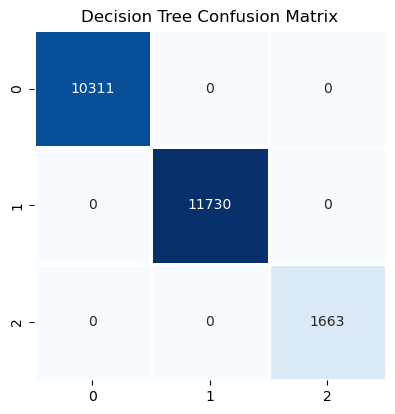

In [92]:
# DT

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)

print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_dt), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Random Forest ---
1.0
[[10311     0     0]
 [    0 11730     0]
 [    0     0  1663]]


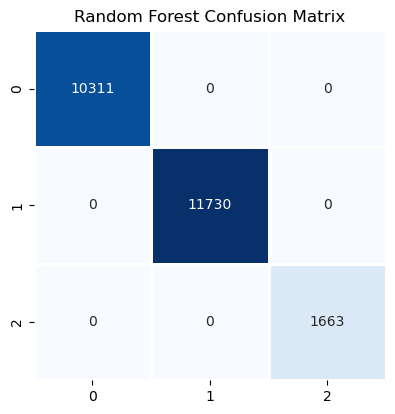

In [93]:
# RF

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print("\n--- Random Forest ---")
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test, pred_rf))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_rf), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Logistic Regression Classifier ---
1.0
[[10311     0     0]
 [    0 11730     0]
 [    0     0  1663]]


C:\Users\a0108\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


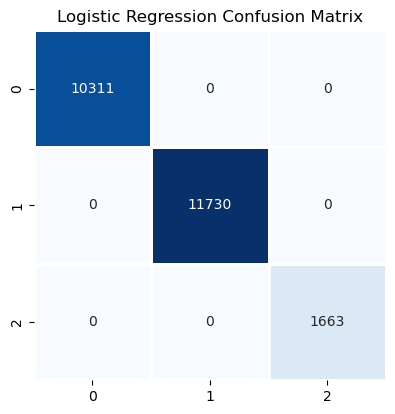

In [94]:
# LR

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)

print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_lr), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()

### 0 : Mild, 1 : Medium, 2 : Strong

### DL(CNN, LSTM)

In [95]:
from scipy import stats
import numpy as np

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 5
STEP = 5

X_train, y_train = create_dataset(X_train[['timestamp', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id']], X_train.label, TIME_STEPS, STEP)

X_test, y_test = create_dataset(X_test[['timestamp', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\a0108\AppData\Local\Temp\ipykernel_7040\2791535504.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\a0108\AppData\Local\Temp\ipykernel_7040\2791535504.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys

(18962, 5, 54) (18962, 1)


In [96]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

C:\Users\a0108\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import to_categorical

In [98]:
#Epoch 500

verbose, batch_size=1,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [99]:
n_timesteps,n_features,n_outputs

(5, 54, 3)

In [100]:
# Training and evaluating the LSTM model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [101]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
534/534 [==============================] - 9s 9ms/step - loss: 0.2850 - acc: 0.8827 - val_loss: 0.1852 - val_acc: 0.9288
Epoch 2/100
534/534 [==============================] - 4s 7ms/step - loss: 0.1315 - acc: 0.9515 - val_loss: 0.1242 - val_acc: 0.9531
Epoch 3/100
534/534 [==============================] - 4s 7ms/step - loss: 0.0769 - acc: 0.9730 - val_loss: 0.0843 - val_acc: 0.9736
Epoch 4/100
534/534 [==============================] - 4s 7ms/step - loss: 0.0505 - acc: 0.9811 - val_loss: 0.0836 - val_acc: 0.9710
Epoch 5/100
534/534 [==============================] - 4s 7ms/step - loss: 0.0368 - acc: 0.9868 - val_loss: 0.0876 - val_acc: 0.9773
Epoch 6/100
534/534 [==============================] - 4s 7ms/step - loss: 0.0314 - acc: 0.9885 - val_loss: 0.0836 - val_acc: 0.9752
Epoch 7/100
534/534 [==============================] - 4s 7ms/step - loss: 0.0176 - acc: 0.9937 - val_loss: 0.0689 - val_acc: 0.9810
Epoch 8/100
534/534 [==============================] - 4s 7ms/step - 

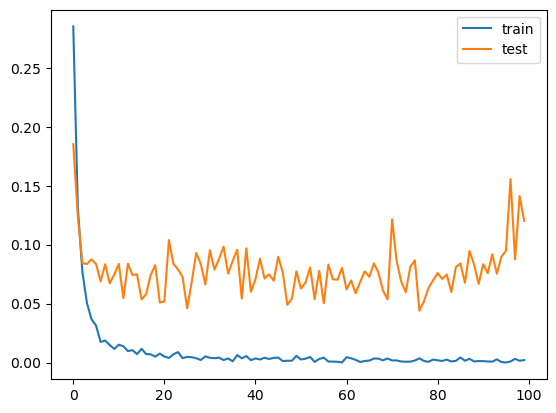

In [102]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [103]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

149/149 [==============================] - 1s 3ms/step


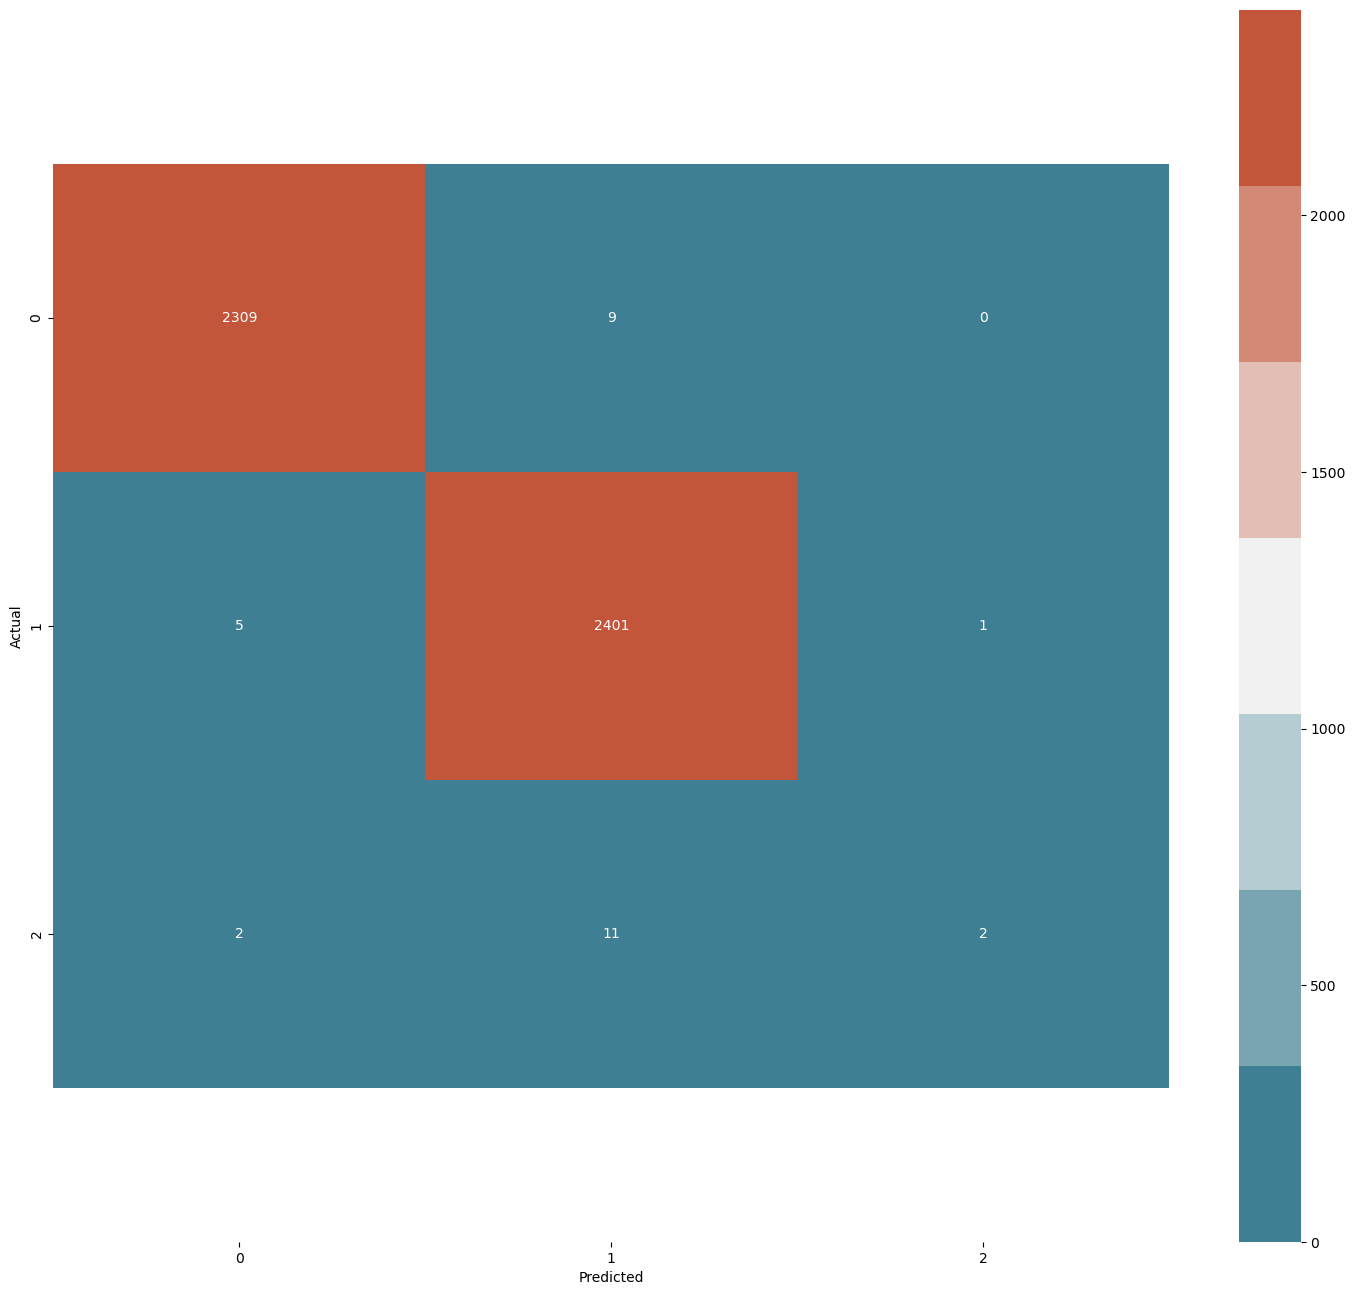

In [104]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(18, 16)) 
    ax = sns.heatmap(cm, annot = True, fmt = "d", cmap = sns.diverging_palette(220, 20, n = 7), ax = ax)

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
    
plot_cm(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0])

In [105]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

149/149 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       0.99      1.00      0.99      2407
           2       0.67      0.13      0.22        15

    accuracy                           0.99      4740
   macro avg       0.89      0.71      0.74      4740
weighted avg       0.99      0.99      0.99      4740

[[2309    9    0]
 [   5 2401    1]
 [   2   11    2]]


In [106]:
#CNN MODEL (Default Setting)

inputs=keras.Input(shape=(n_timesteps,n_features))

conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)

avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_1)

batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

output=tf.keras.layers.Dense(n_outputs,activation='softmax')(batch_norm)

cmodel=tf.keras.Model(inputs=inputs,outputs=output)
cmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 54)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             17344     
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17795 (69.51 KB)
Trainable params: 17667 (69.

In [107]:
cmodel.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

history = cmodel.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(cmodel.summary())

Epoch 1/100
534/534 [==============================] - 2s 2ms/step - loss: 0.5090 - accuracy: 0.7869 - val_loss: 0.3792 - val_accuracy: 0.8334
Epoch 2/100
534/534 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.8636 - val_loss: 0.3168 - val_accuracy: 0.8672
Epoch 3/100
534/534 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.8866 - val_loss: 0.2947 - val_accuracy: 0.8761
Epoch 4/100
534/534 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9053 - val_loss: 0.3055 - val_accuracy: 0.8745
Epoch 5/100
534/534 [==============================] - 1s 2ms/step - loss: 0.2068 - accuracy: 0.9144 - val_loss: 0.2799 - val_accuracy: 0.8793
Epoch 6/100
534/534 [==============================] - 1s 2ms/step - loss: 0.1812 - accuracy: 0.9250 - val_loss: 0.2740 - val_accuracy: 0.8867
Epoch 7/100
534/534 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.9340 - val_loss: 0.2808 - val_accuracy: 0.8877

In [108]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = cmodel.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

149/149 [==============================] - 0s 916us/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2318
           1       0.88      0.88      0.88      2407
           2       0.15      0.13      0.14        15

    accuracy                           0.88      4740
   macro avg       0.64      0.63      0.64      4740
weighted avg       0.88      0.88      0.88      4740

[[2039  276    3]
 [ 271 2128    8]
 [   6    7    2]]


### Accuracy
### ML (SVM: 99.8%, DT: 100%, RF: 100%, LR: 100%)
### DL (CNN: 88%, LSTM: 98%)